<a href="https://colab.research.google.com/github/mirrorball108/EEG-analysis-of-Autism-patients/blob/main/autism_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_pre=pd.read_csv('/content/pre_treatement_combined.csv')
df_pre.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
0,-65,3,-16,20,5,-4,-65,84,26,-71,-7,-8,76,-40,-44,28
1,-108,41,-17,16,-28,183,-85,79,22,-86,5,-10,201,-12,-42,2
2,-177,102,-20,12,-84,481,-113,69,16,-111,25,-14,402,30,-41,-38
3,-270,177,-23,6,-157,849,-145,55,2,-144,51,-19,647,81,-40,-87
4,-383,260,-26,-1,-242,1250,-178,37,-21,-184,80,-26,911,137,-42,-140


In [ ]:
df_post=pd.read_csv('/content/post_treatment_combined.csv')
df_post=df_post.drop([0,1])
df_post.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
2,-74.0,4.0,-16.0,-53.0,1.0,-15.0,-22.0,-32.0,-24.0,-47.0,-56.0,-13.0,-8.0,-43.0,7.0,-24.0
3,-92.0,0.0,-14.0,-31.0,-28.0,-5.0,-20.0,-26.0,-47.0,-42.0,-57.0,9.0,-28.0,-46.0,12.0,-17.0
4,-126.0,-3.0,-12.0,-12.0,-61.0,5.0,-17.0,-21.0,-89.0,-32.0,-57.0,24.0,-52.0,-48.0,18.0,-12.0
5,-163.0,-5.0,-10.0,-5.0,-85.0,10.0,-13.0,-18.0,-136.0,-19.0,-55.0,28.0,-72.0,-47.0,22.0,-9.0
6,-188.0,-6.0,-9.0,-8.0,-91.0,10.0,-10.0,-18.0,-171.0,-8.0,-53.0,20.0,-82.0,-45.0,23.0,-7.0


In [ ]:
region_leads = {
    "Frontal": ['FP1-F3', 'FP2-F4', 'FP2-F8', 'FP1-F7'],
    "Central": ['F3 -C3', 'F4 -C4', 'F7 -T3', 'F8 -T4'],
    "Parietal": ['C3 -P3', 'C4 -P4', 'T3 -T5', 'T4 -T6'],
    "Occipital": ['P3 -O1', 'P4 -O2', 'T5 -O1', 'T6 -O2']
}


In [ ]:
def compute_region_means(df, region_leads):
    region_df = pd.DataFrame()
    for region, leads in region_leads.items():
        leads_clean = [lead.strip() for lead in leads]
        region_df[region] = df[leads_clean].mean(axis=1)
    return region_df


In [ ]:
df_before_region = compute_region_means(df_pre, region_leads)
df_after_region = compute_region_means(df_post, region_leads)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

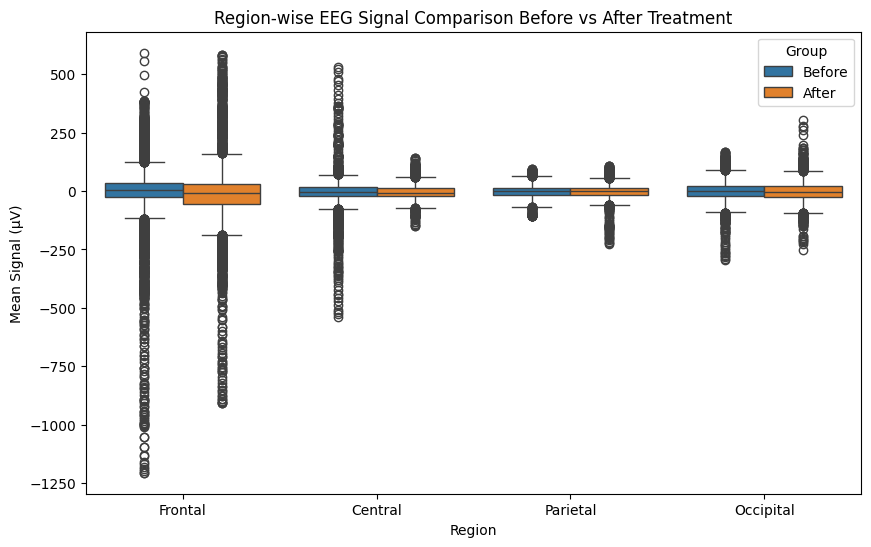

In [ ]:
df_before_region['Group'] = 'Before'
df_after_region['Group'] = 'After'
region_all = pd.concat([df_before_region, df_after_region])

region_melted = region_all.melt(id_vars='Group', var_name='Region', value_name='Signal')

plt.figure(figsize=(10, 6))
sns.boxplot(data=region_melted, x='Region', y='Signal', hue='Group')
plt.title("Region-wise EEG Signal Comparison Before vs After Treatment")
plt.ylabel("Mean Signal (μV)")
plt.show()


## **observations:**

**Frontal Region**- Before treatment group has a wider interquartile range (IQR) than the After group, suggests that treatment may have led to more stable signals.

**Central Region-**  clear reduction in the number and spread of outliers, suggests that treatment may have stabilized irregular or extreme EEG activity in the central brain area, leading to more consistent and typical signal patterns.


**Parietal Region**- Distribution is more compact and symmetric, Minimal change observed between Before and After treatment groups.

**Occipital Region**- After group appears to have a slightly wider spread than the Before group.



### **Implications**

**Frontal and Central regions** show the most significant changes in EEG signal variability post-treatment — possibly indicating neurological or cognitive effects of the treatment.

**Parietal and Occipital regions** remain relatively unaffected, implying treatment may not strongly influence activity in those lobes.

The reduction in outliers and spread post-treatment, especially in the Frontal region, could suggest neural stabilization.



In [ ]:
df_before_region.head()

,Frontal,Central,Parietal,Occipital,Group
0,10.50,-28.00,-33.00,31.00,Before
1,21.75,31.50,-34.75,21.75,Before
2,39.25,125.50,-37.25,7.25,Before
3,55.50,240.75,-39.25,-11.25,Before
4,66.25,365.75,-41.50,-32.50,Before


In [ ]:
df_after_region.head()

,Frontal,Central,Parietal,Occipital,Group
2,-26.25,-25.25,-21.75,-30.50,After
3,-48.75,-23.25,-19.75,-16.25,After
4,-82.00,-19.50,-17.00,-5.25,After
5,-114.00,-15.25,-14.00,-1.00,After
6,-133.00,-12.25,-12.25,-3.25,After


In [ ]:
from scipy.stats import ttest_ind

print("T-test Results (Before vs After per region):")
for region in region_leads.keys():
    stat, p = ttest_ind(df_before_region[region], df_after_region[region])
    print(f"{region}: p-value = {p:.4f}")


T-test Results (Before vs After per region):
Frontal: p-value = 0.0001
Central: p-value = 0.4974
Parietal: p-value = 0.1559
Occipital: p-value = 0.0003


# **According to t test**

**frontal and occipital** show significant difference, treatment may have had an effect (p < 0.05)

**central and parietal** do not show significant difference,can't confidently say the treatment changed that EEG feature (p >= 0.05)



# **Correlation or Network Analysis**

In [ ]:
df_combined = pd.concat([df_pre, df_post], ignore_index=True)


<Axes: >

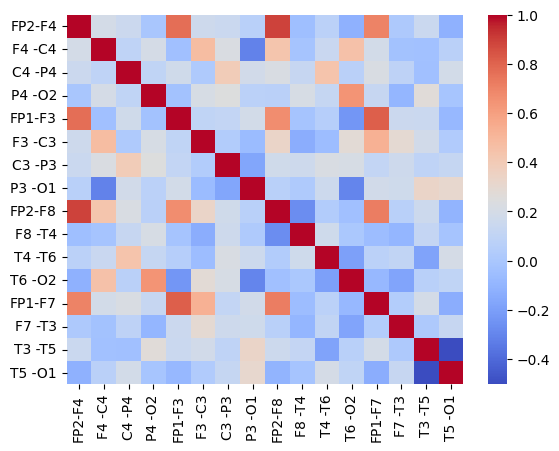

In [ ]:
corr_matrix = df_combined.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")


In [ ]:
asymmetry_fp = df_combined["FP2-F4"] - df_combined["FP1-F3"]
asymmetry_oc = df_combined["P4 -O2"] - df_combined["P3 -O1"]


In [ ]:
asymmetry_fp

,0
0,-70.0
1,-80.0
2,-93.0
3,-113.0
4,-141.0
...,...
15354,-17.0
15355,-6.0
15356,6.0
15357,12.0
